In [44]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


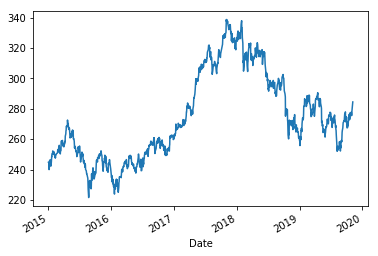

In [33]:
k200 = fdr.DataReader('KS200', '2015')
k200['Close'].plot()

In [34]:
k200.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-10-31,275.82,276.84,279.04,275.82,77180.0,0.0011
2019-11-01,278.43,276.17,278.55,275.59,56880.0,0.0095
2019-11-04,282.54,279.90,282.77,279.90,75200.0,0.0148
2019-11-05,284.38,282.99,284.43,282.31,74550.0,0.0065
2019-11-06,284.52,284.31,286.43,283.70,74800.0,0.0005


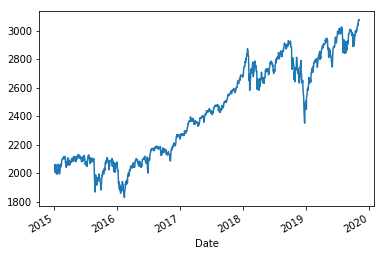

In [35]:
s500 = fdr.DataReader('US500', '2015')
s500['Close'].plot()

In [36]:
s500['Close_shifted'] = s500['Close'].shift(1)
s500['Change_shifted'] = s500['Change'].shift(1)
s500.tail()

,Close,Open,High,Low,Volume,Change,Close_shifted,Change_shifted
Date,,,,,,,,
2019-10-30,3046.77,3039.74,3050.10,3025.96,0.0,0.0033,3036.89,-0.0008
2019-10-31,3037.56,3046.90,3046.90,3023.19,0.0,-0.0030,3046.77,0.0033
2019-11-01,3066.91,3050.72,3066.95,3050.72,0.0,0.0097,3037.56,-0.0030
2019-11-04,3078.27,3078.96,3085.20,3074.87,0.0,0.0037,3066.91,0.0097
2019-11-05,3074.62,3080.80,3083.95,3072.15,0.0,-0.0012,3078.27,0.0037


In [37]:
# s500.columns=['SNP500_Close'
#             ,'SNP500_Open'
#             ,'SNP500_High'
#             ,'SNP500_Low'
#             ,'SNP500_Volume'
#             ,'SNP500_Change']

In [38]:
mrg1 = pd.merge(k200, s500, left_index=True, right_index=True)

In [39]:
mrg1.head()

,Close_x,Open_x,High_x,Low_x,Volume_x,Change_x,Close_y,Open_y,High_y,Low_y,Volume_y,Change_y,Close_shifted,Change_shifted
Date,,,,,,,,,,,,,,
2015-01-02,244.79,243.96,245.32,243.25,54150.0,0.0030,2058.20,2058.90,2072.36,2046.04,0.0,-0.0003,NaN,NaN
2015-01-05,244.26,243.83,244.56,241.76,62850.0,-0.0022,2020.58,2054.44,2054.44,2017.34,0.0,-0.0183,2058.20,-0.0003
2015-01-06,239.93,241.36,242.06,239.32,66250.0,-0.0177,2002.61,2022.15,2030.25,1992.44,0.0,-0.0089,2020.58,-0.0183
2015-01-07,240.53,239.41,240.91,239.09,54600.0,0.0025,2025.90,2005.55,2029.61,2005.55,0.0,0.0116,2002.61,-0.0089
2015-01-08,243.94,242.28,244.13,241.68,64020.0,0.0142,2062.14,2030.61,2064.08,2030.61,0.0,0.0179,2025.90,0.0116


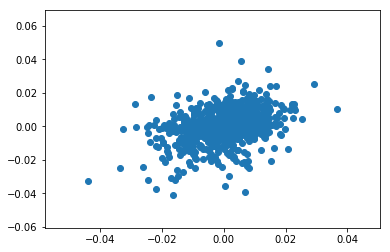

In [40]:
plt.scatter(mrg1['Change_x'], mrg1['Change_shifted'])

In [49]:
# 선형회귀

import statsmodels.api as sm

mrg2 = mrg1.dropna()

X = mrg2['Change_x']
Y = mrg2['Change_shifted']

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# 회귀분석 결과의 출력
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         Change_shifted   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     163.2
Date:                Wed, 06 Nov 2019   Prob (F-statistic):           4.73e-35
Time:                        16:26:20   Log-Likelihood:                 3925.1
No. Observations:                1152   AIC:                            -7846.
Df Residuals:                    1150   BIC:                            -7836.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.590      0.1

p < 0.000 이므로 회귀모형은 유의함

In [50]:
# 모형계수 확인

model.params

const       0.000376
Change_x    0.365589
dtype: float64

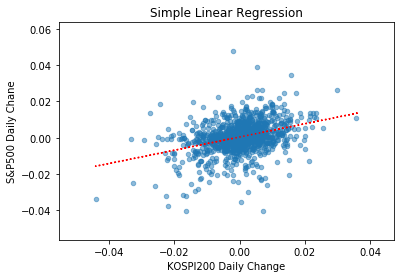

In [56]:
# 산점도 및 회귀선

plt.scatter(rjitt(mrg2['Change_x']), rjitt(mrg2['Change_shifted']), s=20, alpha=0.5)
plt.plot(mrg2['Change_x'], predictions, color='red', linestyle=':')
plt.xlabel('KOSPI200 Daily Change')
plt.ylabel("S&P500 Daily Chane")
plt.title('Simple Linear Regression')
plt.show()